In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# tips = sns.load_dataset("tips")
tips= pd.read_csv("./data/tips.csv")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


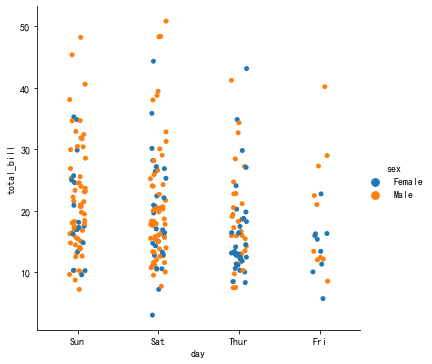

In [9]:
sns.catplot(x="day",y="total_bill",data=tips,hue="sex")

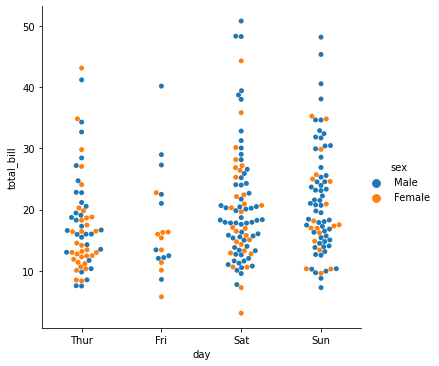

In [4]:
# 想要散开来，那么可以使用 catplot(kind="swarm")
sns.catplot(x="day",y="total_bill",data=tips,kind="swarm",hue="sex")

([<matplotlib.axis.XTick at 0x1af8d434b08>,
 [Text(0, 0, '中国'),
  Text(0, 0, '日本'),
  Text(0, 0, '韩国'),
  Text(0, 0, '美国'),
  Text(0, 0, '加拿大'),
  Text(0, 0, '巴西'),
  Text(0, 0, '英国'),
  Text(0, 0, '法国'),
  Text(0, 0, '意大利'),
  Text(0, 0, '埃塞俄比亚'),
  Text(0, 0, '肯尼亚'),
  Text(0, 0, '尼日利亚')])

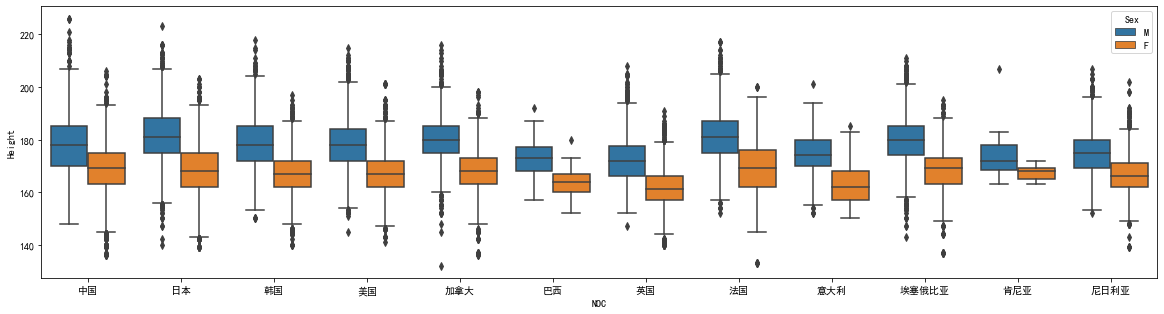

In [5]:
athletes = pd.read_csv("athlete_events.csv")
countries = {
    'CHN':'中国',
    'JPN':"日本",
    'KOR':'韩国',
    'USA':"美国",
    'CAN':"加拿大",
    'BRA':"巴西",
    'GBR':"英国",
    'FRA':"法国",
    'ITA':"意大利",
    'ETH':"埃塞俄比亚",
    'KEN':"肯尼亚",
    'NIG':"尼日利亚",
}
my_athletes = athletes[athletes['NOC'].isin(list(countries.keys()))]
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(20,5))
sns.boxplot(x="NOC",y="Height",data=my_athletes,hue="Sex")
plt.xticks(range(len(countries.values())),countries.values())

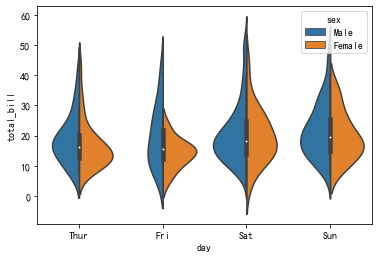

In [6]:
# 小提琴实际上就是两个对称的核密度曲线合并起来，然后中间是一个箱线图（也可以为其他图）组成的。通过小提琴图可以看出数据的分布情况。
# sns.violinplot(x="day",y="total_bill",data=tips,inner="stick")
sns.violinplot(x="day",y="total_bill",data=tips,hue="sex",split=True)

In [7]:
# sns.catplot(x="day",y="total_bill",data=tips,kind="bar",estimator=sum)
titanic = sns.load_dataset("titanic")
# titanic.head()
sns.catplot(x="sex",y="survived",data=titanic,kind="bar",estimator=sum)
sns.catplot(x="sex",data=titanic,kind="count")

ValueError: 'titanic' is not one of the example datasets.

In [ ]:
# kind：表示绘制的图形类型，这里是 point，即点图 ；class：船票等级
sns.catplot(x="sex",y="survived",data=titanic,kind="point",hue="class")

# 分类图的绘制

## 一、分类散点图：
1. stripplot和swarmplot。
2. swramplot采用了一定的算法，可以让点不会重叠。
3. 分类散点图，特别是swarmplot，不太适合数据量特别大的，否则不太美观。

## 二、分布图：
1. 箱线图：boxplot或者是catplot(kind="box")。然后使用hue参数可以进行分组。
2. 小提琴图：violinplot或者是catplot(kind="violin")。小提琴图是由KDE曲线（核密度估计曲线）绘制而成。inner参数可以控制小提琴中的图，可以为box,quartile,stick,point。可以使用hue参数来进行分组，并且可以指定split=True，来将整个小提琴分割开来进行展示。

## 三、统计图：
1. 条形图：barplot，他会自动进行统计（平均数、比例等），也可以通过`estimator`参数来修改统计函数。
2. 柱状图：countplot，只能统计某个变量数据的个数。x和y只能传一个。
3. 点线图：pointplot，可以看出某个变量的变化关系。